In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
#경고창무시?
import warnings
warnings.filterwarnings("ignore")
#TimeSeries분석
from fbprophet import Prophet
from datetime import datetime
import pandas_datareader as pdr

In [2]:
start = datetime(2016, 1, 1)  
end = datetime(2020, 12, 7) 
ap = pdr.DataReader('AAPL', data_source='yahoo', start=start, end=end)  
ap.head() 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,26.757500,26.205000,26.752501,26.315001,163649200.0,24.182106
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.202784
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.596279
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.134508
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.158121


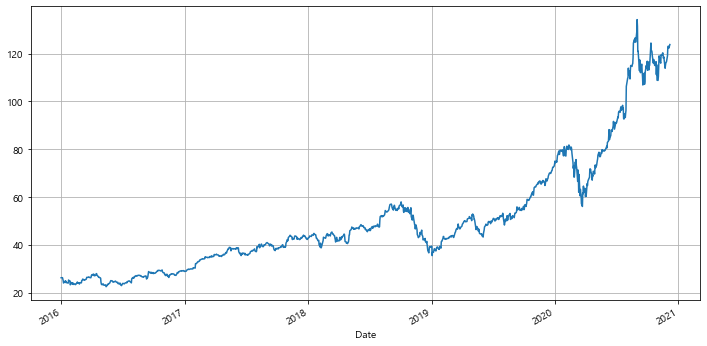

In [3]:
ap.Close.plot(figsize=(12,6), grid=True)  
plt.show()

In [4]:
ap_trunc = ap[:'2020-01-01'] # 2020.1월까지의 데이터로 자르기/2020.이후(11개월치; 343일)월예측해서 실제데이터와 비교할예정
ap_trunc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.886818
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.273392
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.246353
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.669212
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.192863


In [5]:
df = pd.DataFrame({'ds': ap_trunc.index, 'y': ap_trunc.Close})    
df.reset_index(inplace=True)        
del df['Date']     
df.head()

,ds,y
0,2015-12-31,26.315001
1,2016-01-04,26.337500
2,2016-01-05,25.677500
3,2016-01-06,25.174999
4,2016-01-07,24.112499


In [6]:
model = Prophet(daily_seasonality=True)   
model.fit(df)  

In [7]:
future = model.make_future_dataframe(periods=343) 
future.tail()

,ds
1345,2020-12-04
1346,2020-12-05
1347,2020-12-06
1348,2020-12-07
1349,2020-12-08


In [8]:
forecast = model.predict(future)

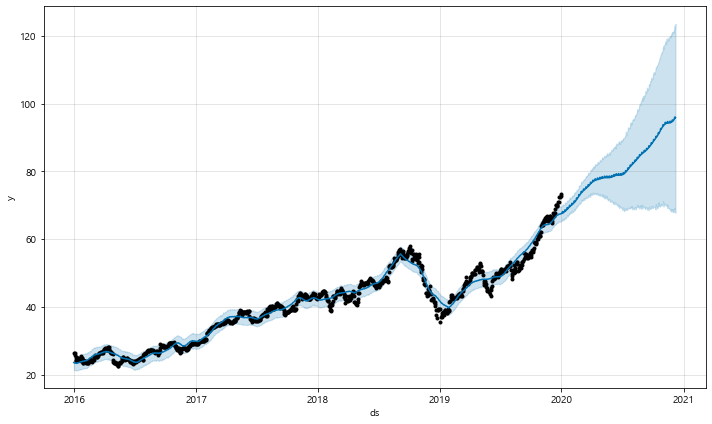

In [9]:
model.plot(forecast); 

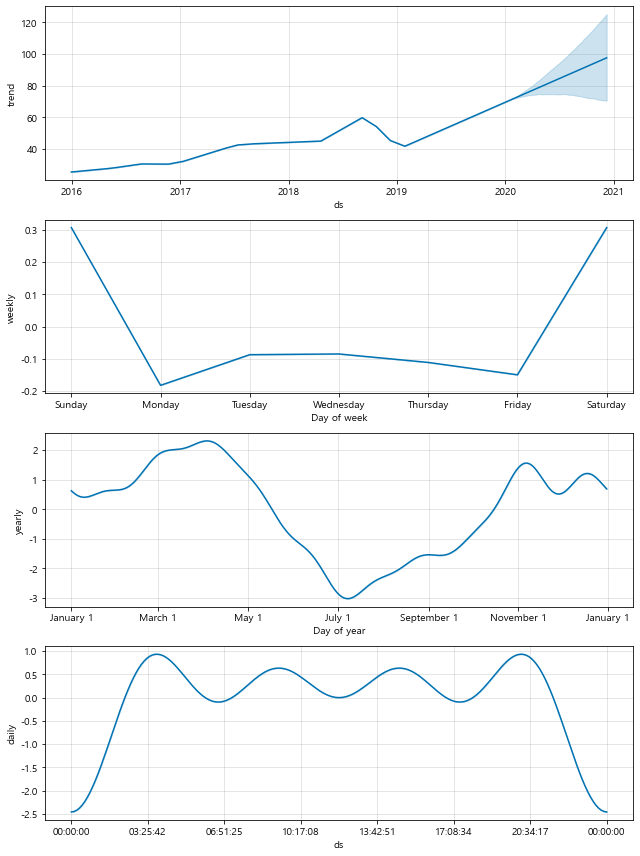

In [10]:
model.plot_components(forecast); 

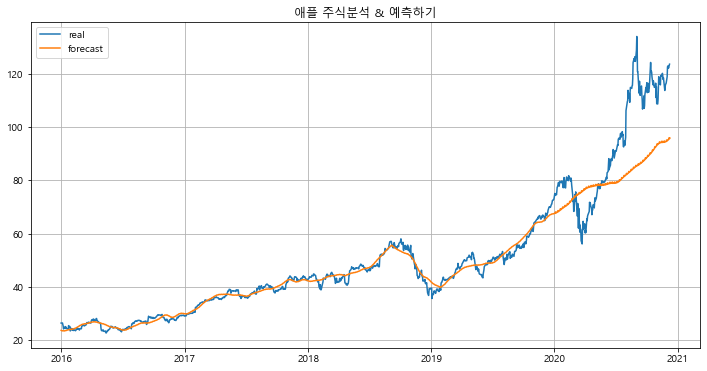

In [11]:
plt.figure(figsize=(12,6))
plt.plot(ap.index, ap.Close, label='real')
plt.plot(forecast.ds, forecast.yhat, label='forecast')
plt.title('애플 주식분석 & 예측하기')
plt.grid()
plt.legend()
plt.show()
#코로나와 상관없이 애플 주식은 증가!!